## Title:  Predicting Sentiment of Movie Reviews
Name: Cristian J. 
Student ID: A14489201
Student Email: crjarqui@ucsd.edu

### Setup:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv(r'C:\Users\Admin\Documents\Python Scripts\IMDB Dataset.csv')
df.columns
df.shape


(50000, 2)

### Data Exploration: 

In [3]:
toke_list = []
for i in range(len(df['review'])):
    toke_count_df = int(len(word_tokenize(df.loc[i,'review'])))
    toke_list.append(toke_count_df)

uni_toke_list = []
for i in range(len(df['review'])):
    toke_count_df = int(len(set(word_tokenize(df.loc[i,'review']))))
    uni_toke_list.append(toke_count_df)


Text(0.5, 1.0, 'Total Number of words per review')

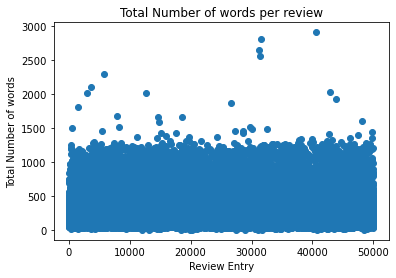

In [4]:
x = list(range(50000))
plt.scatter(x,toke_list)
plt.xlabel('Review Entry')
plt.ylabel('Total Number of words')
plt.title('Total Number of words per review')
# we can see that most reviews have about 1300 words

Text(0.5, 1.0, 'Unique words per review')

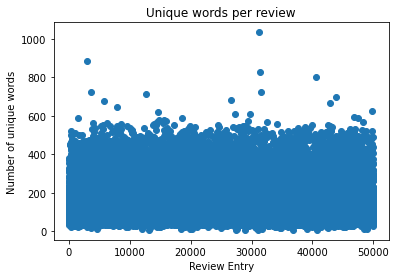

In [5]:
x = list(range(50000))
plt.scatter(x,uni_toke_list)
plt.xlabel('Review Entry')
plt.ylabel('Number of unique words')
plt.title('Unique words per review')
# we can see that there's about 500 unique words per review

In [6]:
# function to convert pos/neg into 1/0 
def convert_label(label):
    
    new_label = []
    for i in range(0,len(label)):
        if label[i] == 'positive':
            add_label = 1.0
            new_label.append(add_label)
        elif label[i] == 'negative':
            add_label = 0.0
            new_label.append(add_label)

    return new_label


In [7]:
#converting the sentiment and adding it as a column to dataframe 
y = convert_label(df['sentiment'])
df['y'] = y

df.head()

,review,sentiment,y
0,One of the other reviewers has mentioned that ...,positive,1.0
1,A wonderful little production. <br /><br />The...,positive,1.0
2,I thought this was a wonderful way to spend ti...,positive,1.0
3,Basically there's a family where a little boy ...,negative,0.0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1.0


In [8]:
pos_count = 0
for i in range(0,50000):
    if df['y'][i] ==1:
        pos_count = pos_count +1
        
print('# of positive reviews: ', pos_count)
neg_count = 50000 - pos_count
print('# of negative reviews: ', neg_count)

# of positive reviews:  25000
# of negative reviews:  25000


### Data Anlaysis:

In [9]:
# this vectorizer will 
vectorizer = CountVectorizer(analyzer='word',
                             max_features=2000,
                             tokenizer=word_tokenize,
                             stop_words=stopwords.words('english'))


r = df['review'][:5000]
df_X = vectorizer.fit_transform(r).toarray()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [10]:
df_y = np.array(df['y'][:5000])


In [11]:
X = df_X
y = df_y

df_train_X, df_test_X, df_train_y, df_test_y = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = True)

# use train test split here while assigning the var
# why?
# we used this function so that we can choose random entries for each variable
# the first way I was doing it was have it set to the first 1000 entries but 
# could be some bias where all of those entries could have been for positive review

#### Support Vector Machine  

In [12]:
kernel = ['linear', 'poly','rbf', 'sigmoid']

for i in range(len(kernel)):
    df_clf = SVC(kernel = kernel[i])
    df_clf.fit(df_train_X,df_train_y)
    df_pred_train_y = df_clf.predict(df_train_X) 
    df_pred_test_y = df_clf.predict(df_test_X)
    score = df_clf.score(df_test_X, df_test_y)
    print(kernel[i], 'has an accuracy of :', score)
    print('performance of the classifier on the training set:')
    print(classification_report(df_train_y,df_pred_train_y))
    print('performance of the classifier on the testing set:')
    print(classification_report(df_test_y, df_pred_test_y))


linear has an accuracy of : 0.801
performance of the classifier on the training set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2002
         1.0       1.00      1.00      1.00      1998

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

performance of the classifier on the testing set:
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       530
         1.0       0.78      0.81      0.79       470

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000

poly has an accuracy of : 0.664
performance of the classifier on the training set:
              precision    recall  f1-score   support

         0.0       0.97      0.51      0.67      2002
         1.0       

#### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

penalty = ['l1', 'l2', 'elasticnet' , 'none']

for i in range(len(penalty)):
    df_clf = LogisticRegression(penalty = penalty[i], solver='saga', l1_ratio=0.1, tol=0.01)
    df_clf.fit(df_train_X, df_train_y)
    df_pred_train_y = df_clf.predict(df_train_X)
    df_pred_test_y = df_clf.predict(df_test_X)
    score = df_clf.score(df_test_X, df_test_y)
    print(penalty[i], 'has an accuracy of :', score)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


l1 has an accuracy of : 0.821


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


l2 has an accuracy of : 0.82
elasticnet has an accuracy of : 0.819


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))


none has an accuracy of : 0.82


#### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# i have tried 1,5,10,100 for n_neigh and 1 is best then platoes to about .55 after
# note: changing it from uniform to distance doesn't change the score
# the score will Return the mean accuracy on the given test data and labels.
for i in range(len(algorithm)):
    neigh = KNeighborsClassifier(n_neighbors=1,weights ='distance', algorithm = algorithm[i])
    neigh.fit(df_train_X, df_train_y)
    df_pred_train_y = neigh.predict(df_train_X)
    df_pred_test_y = neigh.predict(df_test_X)
    score = neigh.score(df_test_X, df_test_y)
    print(algorithm[i], 'has an accuracy of :', score)
    print('performance of the classifier on the training set:')
    print(classification_report(df_train_y, df_pred_train_y))
    print('performance of the classifier on the testing set:')
    print(classification_report(df_test_y, df_pred_test_y))


auto has an accuracy of : 0.53
performance of the classifier on the training set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2002
         1.0       1.00      1.00      1.00      1998

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

performance of the classifier on the testing set:
              precision    recall  f1-score   support

         0.0       0.56      0.55      0.55       530
         1.0       0.50      0.50      0.50       470

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.53      0.53      1000

ball_tree has an accuracy of : 0.532
performance of the classifier on the training set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2002
         1.0     

### Results:

In [15]:
KNN_data = {'index': ['2000 features', '1000 features', '750 features', '500 features'],
        'auto':  [0.531, 0.554, 0.557, 0.531],
        'ball_tree': [0.534, 0.553, 0.554, 0.529],
        'kd_tree': [0.531, 0.554, 0.557, 0.531],
        'brute': [0.532, 0.551, 0.551, 0.534]}

KNN_df = pd.DataFrame (KNN_data, columns = ['index','auto','ball_tree', 'kd_tree','brute'])
KNN_df = KNN_df.set_index('index')
KNN_df

,auto,ball_tree,kd_tree,brute
index,,,,
2000 features,0.531,0.534,0.531,0.532
1000 features,0.554,0.553,0.554,0.551
750 features,0.557,0.554,0.557,0.551
500 features,0.531,0.529,0.531,0.534


In [16]:
LR_data = {'index': ['2000 features', '1000 features', '750 features', '500 features'],
        'l1':  [0.814, 0.818, 0.813, 0.796],
        'l2': [0.819, 0.817, 0.813, 0.797],
        'elasticnet': [0.818, 0.816, 0.813, 0.796],
        'none': [0.816, 0.816, 0.814, 0.797]}

LR_df = pd.DataFrame (LR_data, columns = ['index','l1', 'l2', 'elasticnet' , 'none'])
LR_df = LR_df.set_index('index')
LR_df

,l1,l2,elasticnet,none
index,,,,
2000 features,0.814,0.819,0.818,0.816
1000 features,0.818,0.817,0.816,0.816
750 features,0.813,0.813,0.813,0.814
500 features,0.796,0.797,0.796,0.797


In [17]:
SVC_data = {'index': ['2000 features', '1000 features', '750 features', '500 features'],
        'linear':  [0.796, 0.797, 0.824, 0.815],
        'poly': [0.54, 0.62, 0.657, 0.692],
        'rbf': [0.771, 0.788, 0.783, 0.773],
        'sigmoid': [0.516, 0.507, 0.525, 0.533]}

SVC_df = pd.DataFrame (SVC_data, columns = ['index','linear', 'poly','rbf', 'sigmoid'])
SVC_df = SVC_df.set_index('index')
SVC_df

,linear,poly,rbf,sigmoid
index,,,,
2000 features,0.796,0.540,0.771,0.516
1000 features,0.797,0.620,0.788,0.507
750 features,0.824,0.657,0.783,0.525
500 features,0.815,0.692,0.773,0.533
